### Plotting the confidence intervals for N2 vs all 96 test conditions from screen 1

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Ellipse
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi
import pathlib as plb

In [2]:
dat_path = plb.Path('C:/Users/Emily/Desktop/DS/')
combined = pd.DataFrame()
subset = ['control', 'Compound', 'test', 'test_N', 'difference', 'bca_low', 'bca_high']

for dat in dat_path.glob('btwn_strains_*.csv'):
    h = pd.read_csv(dat, usecols=subset)
    combi`ned = combined.append(h)
combined.to_csv('C:/Users/Emily/Desktop/DS/allStrains_CIs.csv')

#### Generating plots comparing the 95% bootstrapped mean difference confidence intervals of the N2 response for each test condition against the null reference conditions DMSO:DMSO and DMSO:H2O

In [17]:
comps = ['DMSO', 'MT', 'IA', 'DI', '1OCT', '2NO']
comps

['DMSO', 'MT', 'IA', 'DI', '1OCT', '2NO']

In [17]:
strains = combined['test'].unique()
strains = strains.tolist()
strains.insert(0, 'N2')
print(strains)

['N2', 'EG4725', 'DL238', 'CX11314', 'CB4856', 'ED3017', 'JU775']


<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>


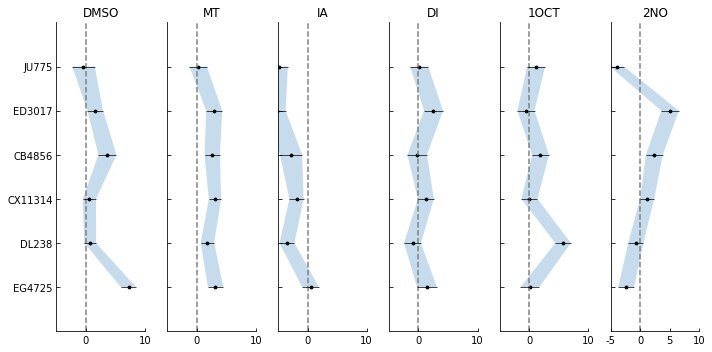

In [34]:


fig, ax = plt.subplots(figsize=(10,5), ncols=(len(comps)), sharey=True) 

for c in comps:

   
    #comp_ord = N2_dat.loc[N2_dat['control'] == 'DMSO']['test']
    positions = list(range(0, len(comps)))
    
    sub = combined.loc[combined['Compound']== c] 
    r = comps.index(c)
    
    lines = []

    for index, row in sub.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines.append(line)


    ytick_labels = list(sub['test'])

    mdiffs = list(sub['difference'])

    hln_coll = mpl.collections.LineCollection(lines, colors='black', linewidths = .7)

    #ax[r,c] = plt.gca()
    
    print(type(sub['bca_low'][0]))
    print(type(sub['bca_low']))
    
    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)

    ax[r].axvline(0, ls='--', c='gray', zorder=1)
    ax[r].fill_betweenx(positions, sub['bca_low'], sub['bca_high'], alpha=.25, joinstyle='round')
    ax[r].add_collection(hln_coll)
    ax[r].scatter(mdiffs, positions, s=8, c='black')
    ax[r].tick_params(axis='both', tickdir='in')
    ax[r].spines['top'].set_visible(False)
    ax[r].spines['right'].set_visible(False)

    ax[r].set_xlim(-5, (10))    
    ax[r].set_ylim(-1, len(comps))
    ax[r].set_title(c)

    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/Images/N2_only.svg')

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), ncols=(len(comps)), sharey=True) 

for s in strains:

   
    #comp_ord = N2_dat.loc[N2_dat['control'] == 'DMSO']['test']
    positions = list(range(0, len(comps)))
    
    sub = combined.loc[combined['Compound']== c] 
    r = comps.index(c)
    
    lines = []

    for index, row in sub.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines.append(line)


    ytick_labels = list(sub['test'])

    mdiffs = list(sub['difference'])

    hln_coll = mpl.collections.LineCollection(lines, colors='black', linewidths = .7)

    #ax[r,c] = plt.gca()
    
    print(type(sub['bca_low'][0]))
    print(type(sub['bca_low']))
    
    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)

    ax[r].axvline(0, ls='--', c='gray', zorder=1)
    ax[r].fill_betweenx(positions, sub['bca_low'], sub['bca_high'], alpha=.25, joinstyle='round')
    ax[r].add_collection(hln_coll)
    ax[r].scatter(mdiffs, positions, s=8, c='black')
    ax[r].tick_params(axis='both', tickdir='in')
    ax[r].spines['top'].set_visible(False)
    ax[r].spines['right'].set_visible(False)

    ax[r].set_xlim(-5, (10))    
    ax[r].set_ylim(-1, len(comps))
    ax[r].set_title(c)

    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/Images/N2_only.svg')